<a href="https://colab.research.google.com/github/auriwan/Neural-Language-processing/blob/main/Membuat_Model_NLP_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Pertama** : Membuat Model NLP dengan TensorFlow


Nama: Auriwan Yasper

email: auriwanyasper@gmail.com

dataset yang digunakan adalah sebagai berikut

https://www.kaggle.com/kishanyadav/inshort-news?select=inshort_news_data-1.csv

In [ ]:
#mengupload dataset
from google.colab import files
uploaded = files.upload()

Saving inshort_news_data-1.csv.zip to inshort_news_data-1.csv.zip


In [ ]:
#extrax file zip ke folder baru
import zipfile

local_zip='/content/inshort_news_data-1.csv.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/dataset_baru')
zip_ref.close()

In [ ]:
#membuat dataframe dari dataset
import pandas as pd
df=pd.read_csv('/dataset_baru/inshort_news_data-1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4817 non-null   int64 
 1   news_headline  4817 non-null   object
 2   news_article   4817 non-null   object
 3   news_category  4817 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.7+ KB


In [ ]:
#pilih data dengan menhapus data tidak penting
df=df.drop(columns=['Unnamed: 0','news_headline'])
df

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology
...,...,...
4812,"AstraZeneca, which is developing a coronavirus...",science
4813,As many as two billion people will face 60°C t...,science
4814,Scientists have said that the weight of human-...,science
4815,The IUCN released an update of its Red List of...,science


# **Pengolahan data**
data diolah mejadi lebih ringkas dalam huruf kecil, tampa kata-kata kurang penting dan tanda baca agar pelatihan lebih maksimal dan bisa diproses oleh tokenizer

In [ ]:
#melihat data text
df.news_article

0       DeepMind's AI system 'AlphaFold' has been reco...
1       Microsoft Teams will stop working on Internet ...
2       China, in response to reports of US adding Chi...
3       The global smartphone sales in the third quart...
4       The European Union (EU) is hoping that US Pres...
                              ...                        
4812    AstraZeneca, which is developing a coronavirus...
4813    As many as two billion people will face 60°C t...
4814    Scientists have said that the weight of human-...
4815    The IUCN released an update of its Red List of...
4816    Environment Minister Prakash Javadekar has sai...
Name: news_article, Length: 4817, dtype: object

In [ ]:
#ubah data jadi huruf kecil semua
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
df

,news_article,news_category
0,deepmind's ai system 'alphafold' has been reco...,technology
1,microsoft teams will stop working on internet ...,technology
2,"china, in response to reports of us adding chi...",technology
3,the global smartphone sales in the third quart...,technology
4,the european union (eu) is hoping that us pres...,technology
...,...,...
4812,"astrazeneca, which is developing a coronavirus...",science
4813,as many as two billion people will face 60°c t...,science
4814,scientists have said that the weight of human-...,science
4815,the iucn released an update of its red list of...,science


In [ ]:
# Menghapus tanda baca
import string
def haspusTandaBaca(text):
  return(text.translate(str.maketrans(' ',' ',string.punctuation)))

df.news_article = df.news_article.apply(haspusTandaBaca)
df

,news_article,news_category
0,deepminds ai system alphafold has been recogni...,technology
1,microsoft teams will stop working on internet ...,technology
2,china in response to reports of us adding chin...,technology
3,the global smartphone sales in the third quart...,technology
4,the european union eu is hoping that us presid...,technology
...,...,...
4812,astrazeneca which is developing a coronavirus ...,science
4813,as many as two billion people will face 60°c t...,science
4814,scientists have said that the weight of humanm...,science
4815,the iucn released an update of its red list of...,science


In [ ]:
# Menghapus kata  dalam news_article yang tidak memiliki makna dengan stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

st_words = stopwords.words()
def cekKata(text):
  return(' '.join([w for w in text.split() if w not in st_words]))
  
df.news_article = df.news_article.apply(lambda x: cekKata(x))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,news_article,news_category
0,deepminds system alphafold recognised solution...,technology
1,microsoft teams stop working internet explorer...,technology
2,china response reports us adding chinese chipm...,technology
3,global smartphone sales third quarter 2020 fel...,technology
4,european union hoping us presidentelect joe bi...,technology


In [ ]:
#cek data kategori
df.news_category.value_counts()

world            1021
entertainment     998
sports            856
technology        751
politics          546
science           389
automobile        256
Name: news_category, dtype: int64

In [ ]:
#cek data artikel
df.news_article

0       deepminds system alphafold recognised solution...
1       microsoft teams stop working internet explorer...
2       china response reports us adding chinese chipm...
3       global smartphone sales third quarter 2020 fel...
4       european union hoping us presidentelect joe bi...
                              ...                        
4812    astrazeneca developing coronavirus vaccine oxf...
4813    many two billion people 60°c temperatures tent...
4814    scientists said weight humanmade objects likel...
4815    iucn released update red list threatened speci...
4816    environment minister prakash javadekar said in...
Name: news_article, Length: 4817, dtype: object

**melakukan one-hot encoding data ketegorical**

lalu membuat data_baru

In [ ]:
#one-hot encoding data kategorikal
category=pd.get_dummies(df.news_category)
df_baru=pd.concat([df,category],axis=1)
df_baru=df_baru.drop(columns='news_category')
df_baru

,news_article,automobile,entertainment,politics,science,sports,technology,world
0,deepminds system alphafold recognised solution...,0,0,0,0,0,1,0
1,microsoft teams stop working internet explorer...,0,0,0,0,0,1,0
2,china response reports us adding chinese chipm...,0,0,0,0,0,1,0
3,global smartphone sales third quarter 2020 fel...,0,0,0,0,0,1,0
4,european union hoping us presidentelect joe bi...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4812,astrazeneca developing coronavirus vaccine oxf...,0,0,0,1,0,0,0
4813,many two billion people 60°c temperatures tent...,0,0,0,1,0,0,0
4814,scientists said weight humanmade objects likel...,0,0,0,1,0,0,0
4815,iucn released update red list threatened speci...,0,0,0,1,0,0,0


Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values

In [ ]:
#mengubah dataframe menjadi numpy data array
artikel=df_baru['news_article'].values
label=df_baru[['world','entertainment','sports','technology','politics','science','automobile'
               ]].values

In [ ]:
#cek data text array
artikel

array(['deepminds system alphafold recognised solution protein folding grand challenge biology 50 years deepmind showed predict proteins fold 3d shapes complex process fundamental understanding biological machinery life alphafold predict shape proteins within width atom',
       'microsoft teams stop working internet explorer 11 today november 30 users need download teams app browse microsoft edge besides microsoft 365 apps services stop supporting internet explorer 11 august 2021 microsoft pull support microsoft edge legacy desktop app march 9',
       'china response reports us adding chinese chipmaker smic national offshore oil producer cnooc defence blacklist said hoped us erect barriers obstacles cooperation reuters reported president donald trumps administration poised add smic cnooc list companies allegedly owned controlled chinese military',
       ...,
       'scientists said weight humanmade objects likely exceed living things year study published scientific journal nature sc

Membagi data menjadi data training dan testing

In [ ]:
#melakukan split data menjadi data training dan validation
from sklearn.model_selection import train_test_split
artikel_latih, artikel_test, label_latih, label_test = train_test_split(artikel, label, test_size=0.2)

mengubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [ ]:
#mengubah data text menjadi bilangan numerik dengan fungsi tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(artikel_latih)
tokenizer.fit_on_sequences(artikel_test)

#membuat sequence dari setiap data yang sudah diubah
sekuens_latih = tokenizer.texts_to_sequences(artikel_latih)
sekuens_test = tokenizer.texts_to_sequences(artikel_test)

#menambahkan padding pada kalimat dengan pad sequences agar kalimat lbih seragam
paded_latih = pad_sequences(sekuens_latih)
paded_test = pad_sequences(sekuens_test)

arsitektur model menggunakan layer Embedding dengan dimensi embedding sebesar 64, serta dimensi dari input sebesar nilai jumlah kata pada objek tokenizer

In [ ]:
#cek jumlah data dalam text dengan menggunakan tokenizer.word_text
a = tokenizer.word_index
jumlah_vocab = len(a)
jumlah_vocab

14622

In [ ]:
#membuat model dengan sequential dengan layer Embedding dan Arsitektur model LSTM
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=jumlah_vocab, output_dim=64),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
#melihat ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          935808    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 1,052,039
Trainable params: 1,052,039
Non-trainable params: 0
_________________________________________________________________


Membuat Callback class untuk fungsi henti jika akurasi model sudah melebihi 90%

In [ ]:
#callback
class callbackDulu(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=0.90 and logs.get('accuracy')>=0.90):
      print("\nAkurasi model sudah melebihi 90%")
      self.model.stop_training =True
henti=callbackDulu()

Selanjutnya mengcompile model dan menententukan optimizer serta loss function yang akan dipakai oleh model

In [ ]:
#compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

melatih model dengan memanggil fungsi fit().

In [ ]:
#training model dengan data yang sudah
history = model.fit(
    paded_latih, label_latih, 
    batch_size=32,
    validation_split=0.2,
    epochs=30, 
    validation_data=(paded_test,label_test),
    verbose=2,
    callbacks=[henti]
)

Epoch 1/30
97/97 - 11s - loss: 1.6798 - accuracy: 0.2713 - val_loss: 1.1880 - val_accuracy: 0.4916 - 11s/epoch - 118ms/step
Epoch 2/30
97/97 - 6s - loss: 0.9892 - accuracy: 0.5941 - val_loss: 0.8064 - val_accuracy: 0.7043 - 6s/epoch - 63ms/step
Epoch 3/30
97/97 - 6s - loss: 0.4901 - accuracy: 0.8316 - val_loss: 0.4084 - val_accuracy: 0.8755 - 6s/epoch - 62ms/step
Epoch 4/30
97/97 - 6s - loss: 0.2952 - accuracy: 0.9004 - val_loss: 0.3954 - val_accuracy: 0.8716 - 6s/epoch - 62ms/step
Epoch 5/30
97/97 - 6s - loss: 0.2317 - accuracy: 0.9231 - val_loss: 0.4499 - val_accuracy: 0.8703 - 6s/epoch - 63ms/step
Epoch 6/30

Akurasi model sudah melebihi 90%
97/97 - 6s - loss: 0.1620 - accuracy: 0.9565 - val_loss: 0.3078 - val_accuracy: 0.9196 - 6s/epoch - 63ms/step


Membuat plot loss dan akurasi pada saat training dan validation.

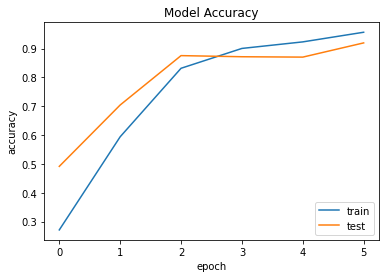

In [ ]:
# Plot akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

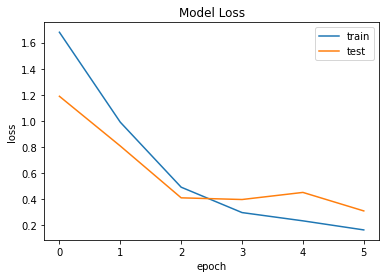

In [ ]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()